<a href="https://colab.research.google.com/github/Hero0963/dscamp_prediction-of-quality-of-wine/blob/main/dscamp_lv2_prediction_of_quality_of_wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#專題實作 #02：紅酒品質分類預測：
1. 在你的 Colab 程式碼中載入 `winequality-red.csv` 資料集，可以參考這一篇 教學 中的網址或上傳方法。

（資料網址：https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv）

2. 請根據 Kaggle 文件瞭解 winequality-red 資料中所有欄位的定義為何？

3. 請你嘗試觀察每一個「特徵」欄位（除 quality 外）資料的分佈情況，有看出什麼結果嗎？

features 與 acid 相關居多，PH約在 3.3
residual sugar, chlorides, dioxide 分布差異較大， quality 差異可能受此 features 影響較大
待進一步探索

4. 請你嘗試觀察每一個「標籤」欄位（quality）資料的分佈情況，有看出什麼結果嗎？
quality 數據集中在 5, 6



In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv')

In [ ]:
display(df)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
data = {
    'Variable': ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality'],
    'Definition': [
    "most acids involved with wine or fixed or nonvolatile (do not evaporate readily)",
    "the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste",
    "found in small quantities, citric acid can add 'freshness' and flavor to wines",
    "the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet",
    "the amount of salt in the wine",
    "the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine",
    "amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine",
    "the density of water is close to that of water depending on the percent alcohol and sugar content",
    "describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale",
    "a wine additive which can contribute to sulfur dioxide gas (S02) levels, which acts as an antimicrobial and antioxidant",
    "",
    "score between 0 and 10",]

}

df_variables_info = pd.DataFrame(data)
pd.set_option('display.max_colwidth', None)
display(df_variables_info)

,Variable,Definition
0,fixed acidity,most acids involved with wine or fixed or nonvolatile (do not evaporate readily)
1,volatile acidity,"the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste"
2,citric acid,"found in small quantities, citric acid can add 'freshness' and flavor to wines"
3,residual sugar,"the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet"
4,chlorides,the amount of salt in the wine
5,free sulfur dioxide,the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine
6,total sulfur dioxide,"amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine"
7,density,the density of water is close to that of water depending on the percent alcohol and sugar content
8,pH,describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale
9,sulphates,"a wine additive which can contribute to sulfur dioxide gas (S02) levels, which acts as an antimicrobial and antioxidant"


In [ ]:
def custom_style(value):
    styles = []
    for i in range(len(value)):
        if i == 0:
            styles.append('font-weight: bold; font-size: larger; color: white')
        else:
            styles.append('font-weight: bold; font-size: larger; color: white')
    return styles

In [ ]:
styled_df = df_variables_info.style.apply(custom_style, subset=['Variable'])
display(styled_df)

,Variable,Definition
0,fixed acidity,most acids involved with wine or fixed or nonvolatile (do not evaporate readily)
1,volatile acidity,"the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste"
2,citric acid,"found in small quantities, citric acid can add 'freshness' and flavor to wines"
3,residual sugar,"the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet"
4,chlorides,the amount of salt in the wine
5,free sulfur dioxide,the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine
6,total sulfur dioxide,"amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine"
7,density,the density of water is close to that of water depending on the percent alcohol and sugar content
8,pH,describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale
9,sulphates,"a wine additive which can contribute to sulfur dioxide gas (S02) levels, which acts as an antimicrobial and antioxidant"


In [ ]:
missing_values = df.isnull().sum()
display(missing_values)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
features = df.drop('quality', axis=1)

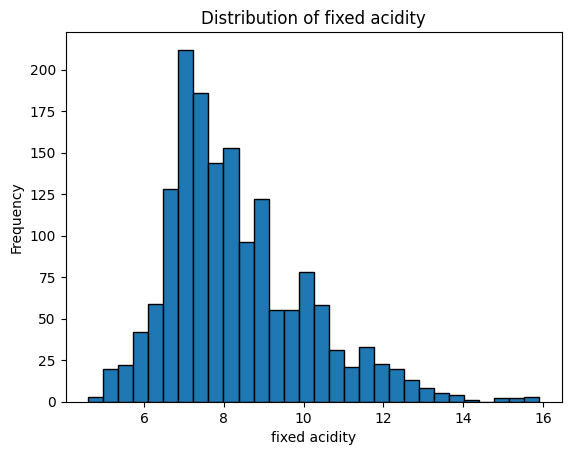

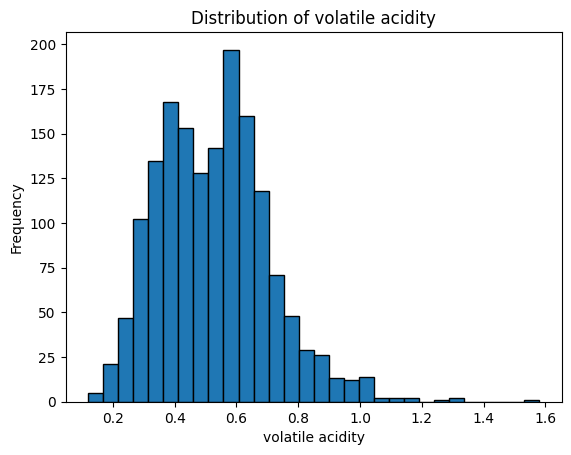

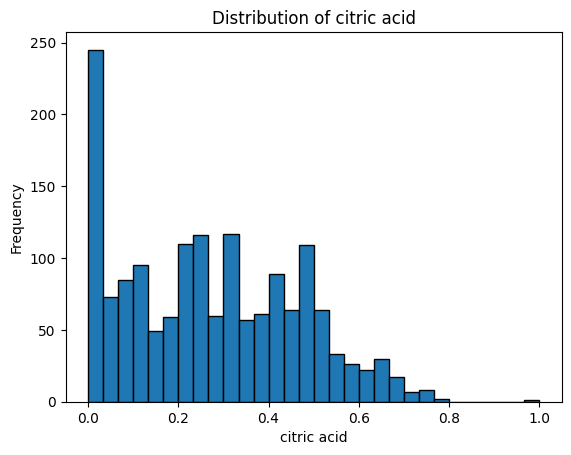

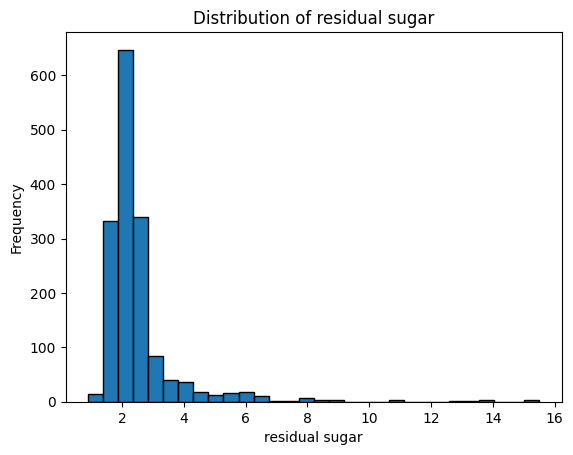

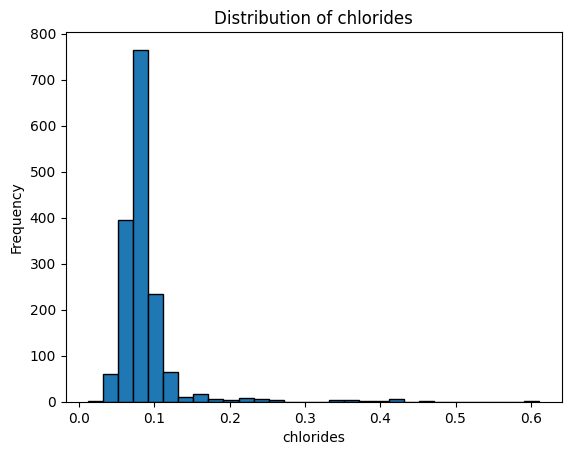

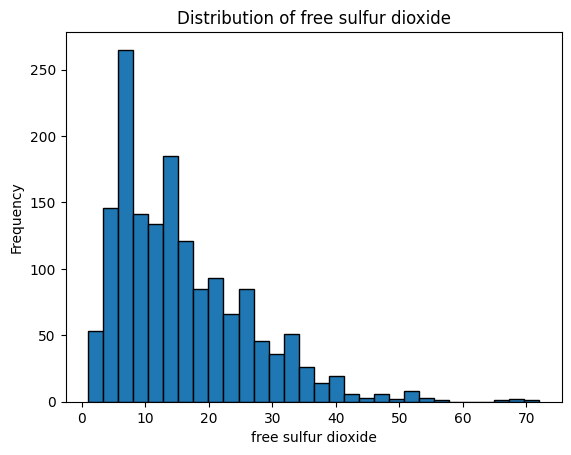

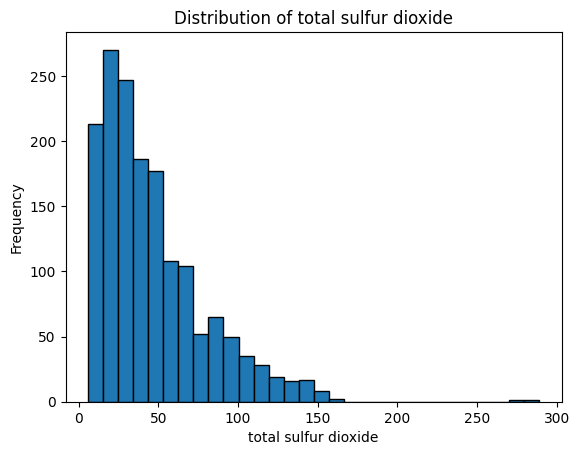

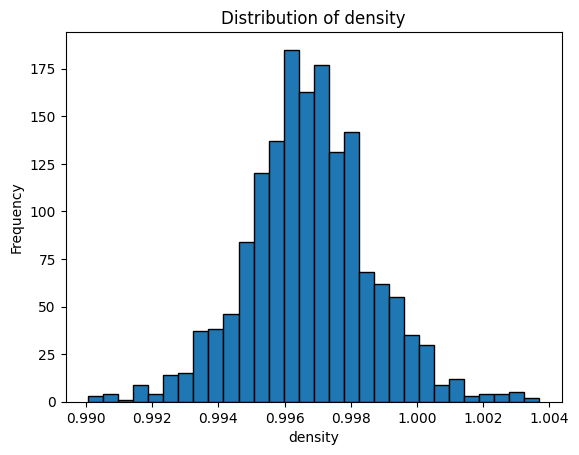

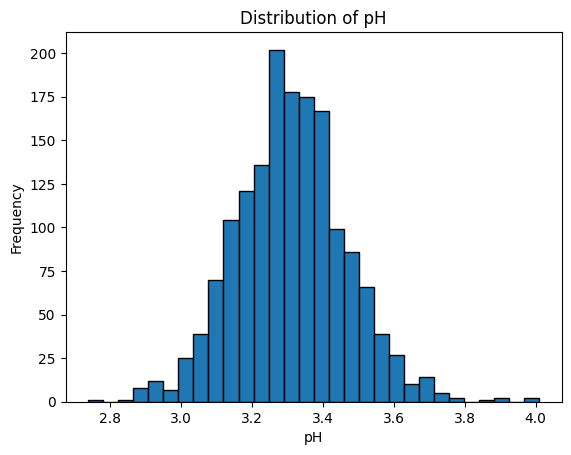

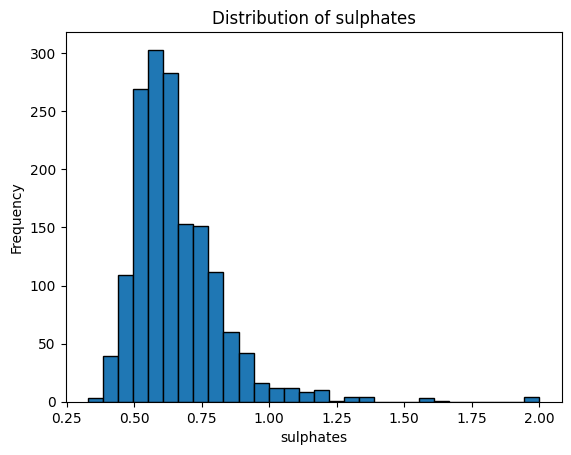

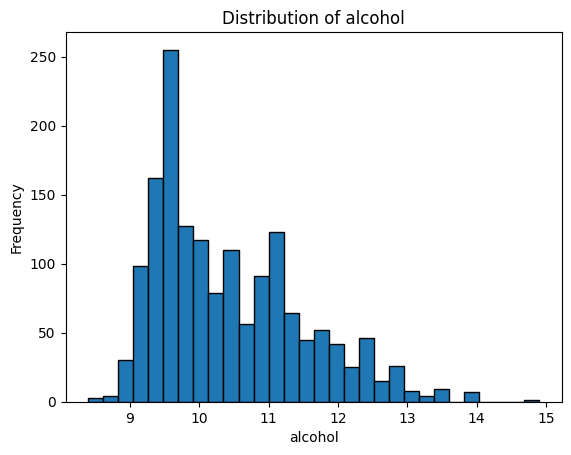

In [ ]:
import matplotlib.pyplot as plt


for column in features.columns:
    plt.figure()
    features[column].plot(kind='hist', bins=30, edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

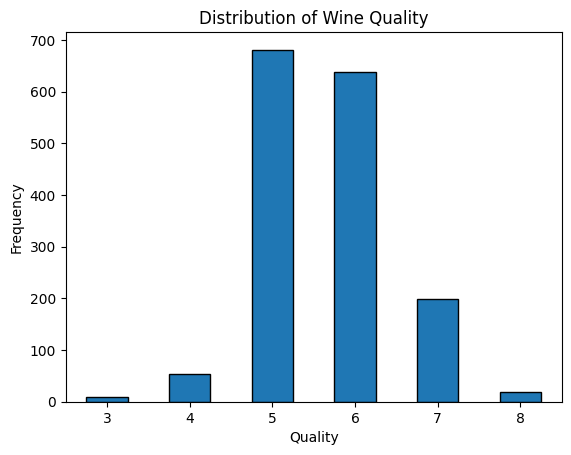

In [ ]:
labels = df['quality']
plt.figure()
labels.value_counts().sort_index().plot(kind='bar', edgecolor='black')
plt.title('Distribution of Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.xticks(rotation='horizontal')
plt.show()